In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

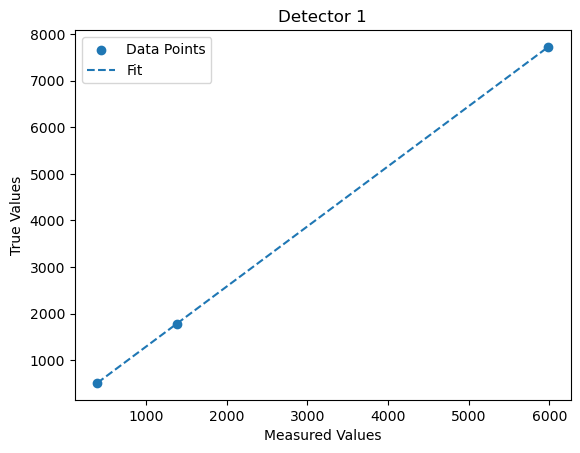

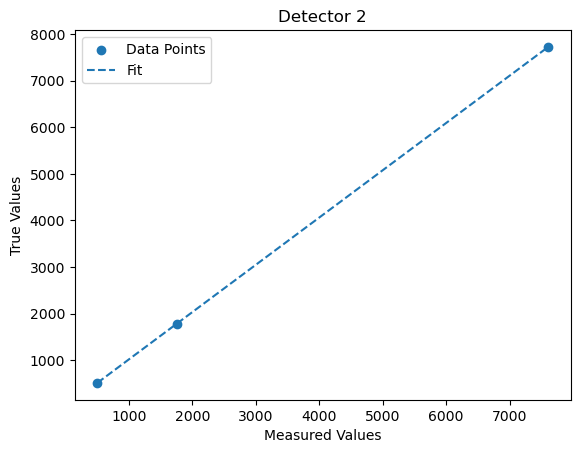

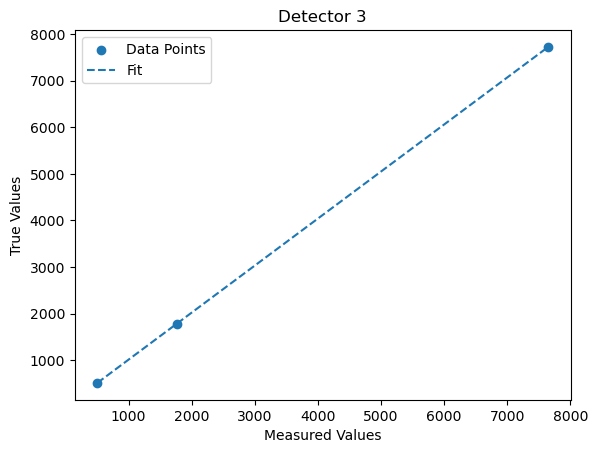

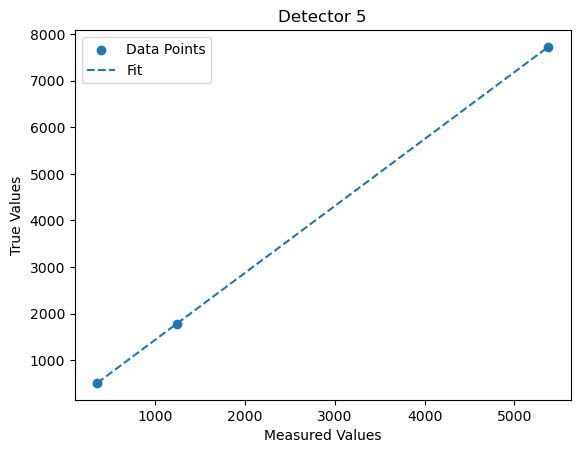

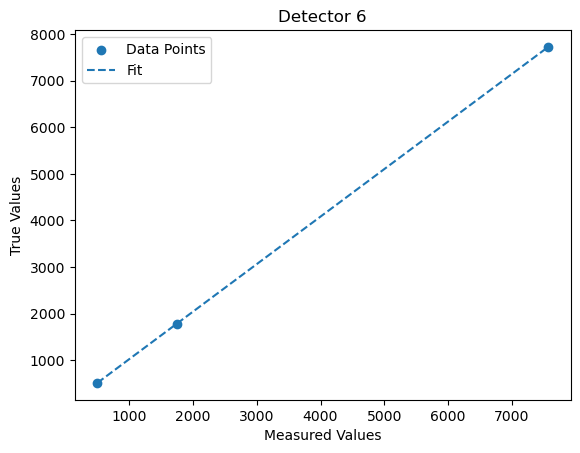

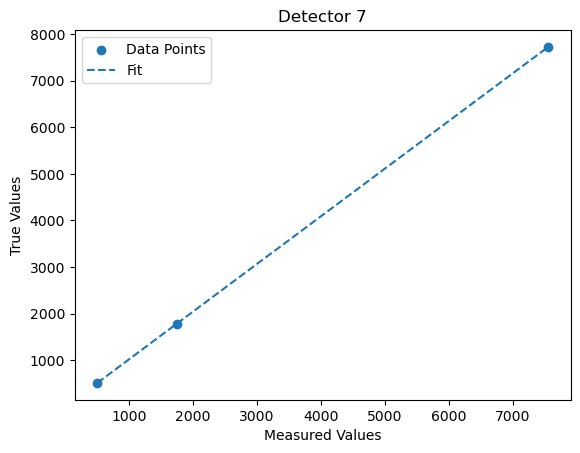

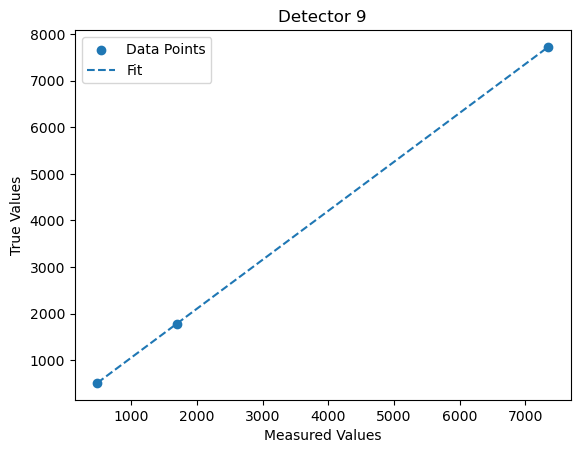

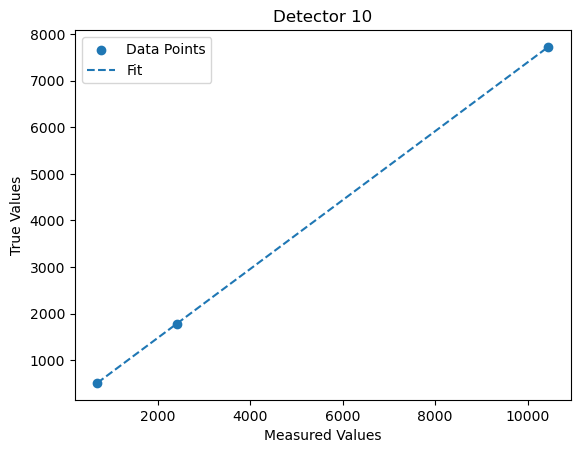

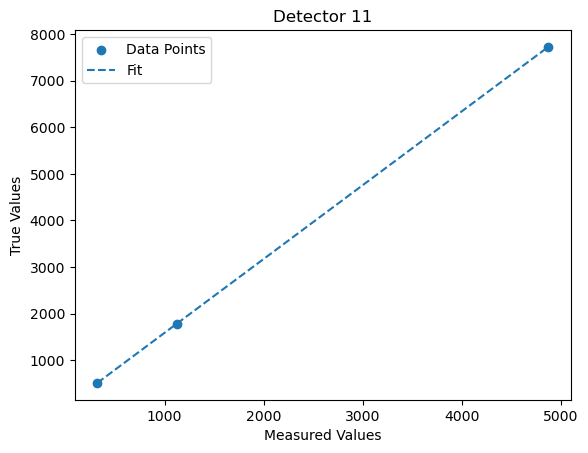

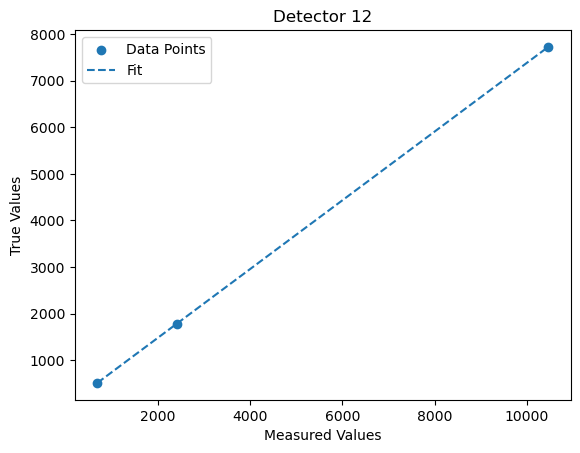

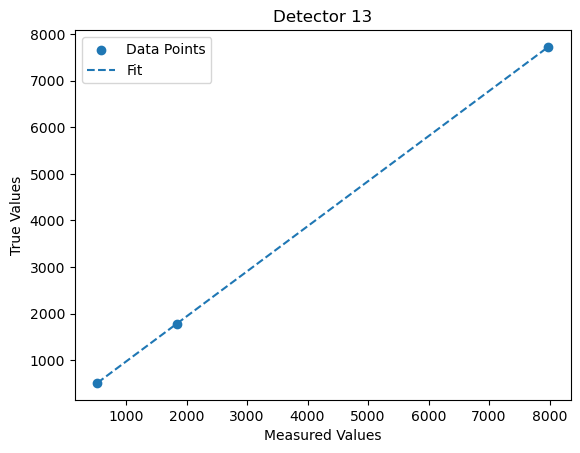

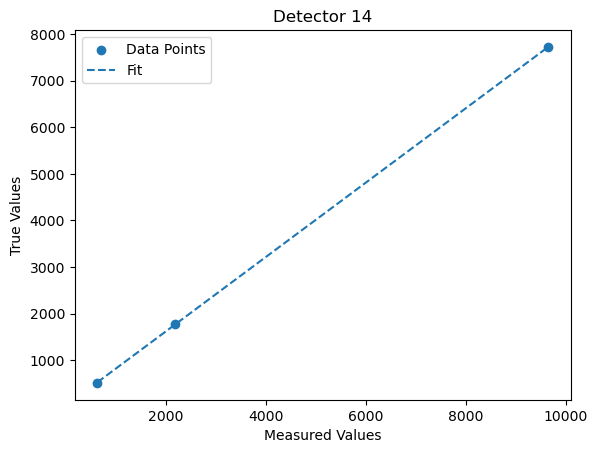

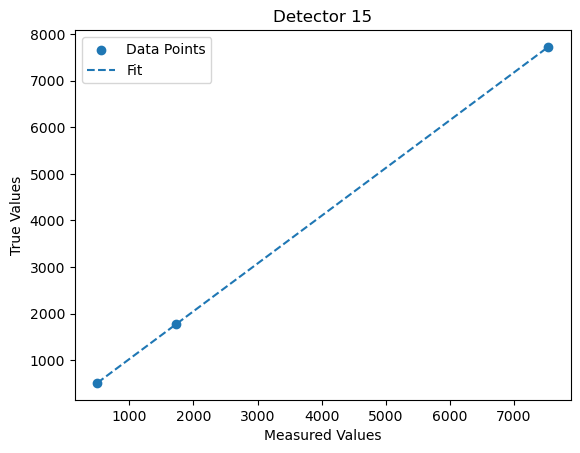

,det,slope,offset
0,1,1.290367,1.110167
1,2,1.015298,0.715410
2,3,1.009515,1.217480
3,5,1.436298,1.000634
4,6,1.020234,0.814961
5,7,1.021975,0.912566
6,9,1.050492,2.688996
7,10,0.739258,0.990195
8,11,1.585665,0.175678
9,12,0.738508,-0.055590


In [3]:


det = np.array([1,2,3,5,6,7,9,10,11,12,13,14,15])
ph_511  = np.array([395,503,505,355,500,499,483,690,322,692,526,626,499])
ph_1779 = np.array([1378,1751,1761,1238,1743,1740,1692,2405,1122,2409,1836,2180,1735])
ph_7724 = np.array([5985,7607,7650,5377,7570,7557,7350,10447,4871,10459,7977,9646,7538])



# df = pd.DataFrame({"det":det,"ph_511":ph_511,"ph_1368":ph_1368,"ph_2754":ph_2754})
# df

def linear_func(x, a, b):
    return a * x + b

slope = []
offset=[]
for i in range(len(det)):
    x = np.array([ph_511[i], ph_1779[i], ph_7724[i]])
    y = np.array([511, 1779, 7724])
    
    poly = np.polynomial.Polynomial.fit(x, y, deg=1)
    # slope.append(poly.convert().coef[1])
    # offset.append(poly.convert().coef[0])
    
    params, covariance = curve_fit(linear_func, x, y)
    slope.append(params[0])
    offset.append(params[1])
    
    fit_x = np.linspace(min(x), max(x), 500)
    fit_y = poly(fit_x)
    
    plt.figure()
    plt.scatter(x, y, label='Data Points')
    plt.plot(fit_x, fit_y, label='Fit', linestyle='--')
    plt.title(f'Detector {det[i]}')
    plt.xlabel('Measured Values')
    plt.ylabel('True Values')
    plt.legend()
    plt.show()






    

df_results = pd.DataFrame({"det":det,"slope":slope,"offset":offset})
df_results


In [4]:
df_results.to_csv("../calib/calib_2023feb.csv",index=False)